# World Happiness Analysis

Principal Investigators: Soma Vasuthevan (SV1168) & Demetrius Beckham (DAB614)

## 1. Project Overview

Happiness seems to be a common and central human desire. In life, we often make decisions to maximize our present and future happiness. Although the drive to be happy appears to be universal, the experience of happiness is inherently subjective. What makes you happy? Your answer might be very different from mine or perhaps our answers might be more similar than we expect. 

In this project, we explore how one's environment can shape their experience of happiness. We analyzed reported levels of happiness and factors such as GDP per capita, pollution, crime and education across 156 countries to identify patterns that might help us better understand what makes us happy and why a group people living in one part of the world might be happier than a group living in another.       

## 1.1 Data

### World Happiness Reports

The [World Happiness Report](http://worldhappiness.report/download/) determines a happiness score for each country using responses to the life evaluation question in the Gallup World Poll, which asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale.

The report identifies six factors - levels of GDP, life expectancy, generosity, social support, freedom, and corruption - that might contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. These factors have no impact on the total score reported for each country, but instead are just a way of explaining the variation in happiness scores for each country. 

* GDP per capita (Economy) is in terms of Purchasing Power Parity (PPP) adjusted to constant 2011 international dollars, taken from the World Development Indicators (WDI) released by the World Bank in September 2017.


* Family (Social support) is based on the Gallup poll question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?” 


* Health is based on healthy life expectancy at birth constructed using data from the World Health Organization (WHO) and WDI.


* Freedom is based on responses to the Gallop poll question - "Are you satisfied or dissatisfied with your freedom to choose what you do with your life?"


* Trust (Perception of government corruption) is based on the gallop poll question - "Is Corruption widespread throughout the government or not?"


* Generosity is based on responses to the Gallop poll question - "Have you donated money to a charity in the past month?"


* Dystopia represents the lowest scores observed for the six key variables. It is an imaginary country that has the world's least-happy people and is used as a benchmark against which all other countries can be compared with, in regards to each of the 6 listed variables. The Dystopia Residual metric for each country is the Dystopia Happiness Score (1.85) + the Residual value, the extent to which the six variables explain its happiness score.

### World Bank Data

To better understand the variation in happiness across countries, we read in the following [World Development Indicators](http://databank.worldbank.org/data/reports.aspx?source=world-development-indicators) reported for each country in 2016:

* Adjusted net enrollment rate, primary (% of primary school age children)
* PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)
* PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
* Patent applications, residents
* International Homicides (per 100,000 people)
* GDP per capita, PPP (current international $)
* Population, total
* Population density (people per sq. km of land area)


### Crime Data

The [Crime Index](https://www.numbeo.com/crime/rankings_by_country.jsp?title=2015) is based on surveys from visitors of the website - www.numbeo.com. Questions for these surveys are similar to many similar scientific and government surveys. Each entry in the survey is saved as the number in the range [-2, +2], with -2 having meaning of strongly negative and +2 meaning of strongly positive. Survey results are presented on a scale [0, 100] for values. 

Crime Index is an estimation of overall level of crime in a given city or a country. They consider crime levels lower than 20 as very low, crime levels between 20 and 40 as being low, crime levels between 40 and 60 as being moderate, crime levels between 60 and 80 as being high and finally crime levels higher than 80 as being very high.

We believe that although this data may be less reliable than government statistics, they may be more useful for cross country comparison because people in some countries are much more likely to report a crime than people in other countries, data could also be forged by governmental institutions and moreover, data is not available for most of the world.

### Education Data

We read in the human capital index from [Penn World Table](https://www.rug.nl/ggdc/productivity/pwt/) that is based	on "the average	years of schooling from Barro and Lee (BL, 2013) and an assumed rate of return to education, based on Mincer equation estimates around the world (Psacharopoulos, 1994)."	 

## 1.3 Methodology

We will be reading in data from the World Happiness Report for 2015, 2016 and 2017. These values are averaged over the 3 years to return the 3 year mean for each country. Macro indicators from the sources discussed above are then appended to the countries on the dataframe. We then analyze the impact of the different factors on reported happiness scores. Through our analysis we hope to obtain a better understanding of how specific economic and social factors impact the happiness around the world.

## 2. Importing Packages and Reading in Data

In [1]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import requests, io             # internet and input tools  
import zipfile as zf            # zip file tools 
import shutil                   # file management tools 
import os                       # operating system tools (check files)
import chardet
import quandl
import datetime
import numpy as np

%matplotlib inline  

### Note on the Google Drive code:

You will be prompted to authenticate your google account to access the data which is stored on google drive. We have already created Google Drive API credentials and will include it on the GitHub repository. If you encounter any trouble reading in the data, please follow the instructions below to create your own credentials.

Source: https://pythonhosted.org/PyDrive/_sources/quickstart.txt

Drive API requires OAuth2.0 for authentication. *PyDrive* makes your life much easier by handling complex authentication steps for you.

1. Go to `APIs Console`_ and make your own project.
2. Search for 'Google Drive API', select the entry, and click 'Enable'.
3. Select 'Credentials' from the left menu, click 'Create Credentials', select 'OAuth client ID'.
4. Now, the product name and consent screen need to be set -> click 'Configure consent screen' and follow the instructions. Once finished:

 a. Select 'Application type' to be *Web application*.
 b. Enter an appropriate name.
 c. Input *http://localhost:8080* for 'Authorized JavaScript origins'.
 d. Input *http://localhost:8080/* for 'Authorized redirect URIs'.
 e. Click 'Save'.

5. Click 'Download JSON' on the right side of Client ID to download **client_secret_<really long ID>.json**.

The downloaded file has all authentication information of your application.
**Rename the file to "client_secrets.json" and place it in your working directory.**

### 2.1 World Happiness Report 

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()
gauth.LocalWebserverAuth() # Creates local webserver and auto handles authentication.
drive = GoogleDrive(gauth)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=542848275155-g692v7r9qfn4ip8chdo77gkijg8r5ujd.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [3]:
#file_id of reports zip
file_id = '1jY8qFccnjhClfcAaw_J1bwYhWBBkT0Gj'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(file_id)

zipf = zf.ZipFile(file_id) 

file_list = zipf.namelist()    

file_list

['2015.csv', '2016.csv', '2017.csv']

In [4]:
df15  = pd.read_csv(zipf.open(zipf.namelist()[0]))
df16  = pd.read_csv(zipf.open(zipf.namelist()[1]))
df17  = pd.read_csv(zipf.open(zipf.namelist()[2]))

In [5]:
df15.head() 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### 2.2 World Bank

In [6]:
#Read in and format World Bank data

file_id = '1hN9l_hBj54oAxIa3kosCnTRbKFW8gTxo'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(file_id)

zipf = zf.ZipFile(file_id) 

file_list = zipf.namelist()    

wbdf  = pd.read_csv(zipf.open(zipf.namelist()[0]))

wbdf.head()

,Time,Time Code,Country Name,Country Code,"Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) [EN.ATM.PM25.MC.ZS]","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) [EN.ATM.PM25.MC.M3]",GINI index (World Bank estimate) [SI.POV.GINI],"Patent applications, residents [IP.PAT.RESD]","Intentional homicides (per 100,000 people) [VC.IHR.PSRC.P5]","GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","GDP, PPP (current international $) [NY.GDP.MKTP.PP.CD]","Population, total [SP.POP.TOTL]",Population density (people per sq. km of land area) [EN.POP.DNST]
0,2016,YR2016,Afghanistan,AFG,..,100,62.8548565825039,..,..,..,1944.11700491066,67375381133.9281,34656032,53.0834053242655
1,2016,YR2016,Albania,ALB,95.6585464477539,100,14.6340083732708,..,21,..,11540.0255610802,33190279056.2483,2876101,104.967189781022
2,2016,YR2016,Algeria,DZA,99.2312088012695,100,37.2309558775069,..,106,..,15013.2963798624,609630693492.105,40606052,17.0488949050296
3,2016,YR2016,American Samoa,ASM,..,0,3.76341150774918,..,..,..,..,..,55599,277.995
4,2016,YR2016,Andorra,AND,..,100,10.8794724208596,..,..,..,..,..,77281,164.427659574468


### 2.2 Crime Index

In [7]:
#Read in crime data

url_crime = "https://raw.githubusercontent.com/DBeckham96/GitHub/master/Crime%20Index%20for%20Country%202015.csv"

crime = pd.read_csv(url_crime)

cdf = pd.DataFrame(crime)

cdf.drop("Rank",inplace = True,axis = 1)

cdf.head()

,Country,Crime Index,Safety Index
0,South Sudan,85.32,14.68
1,Venezuela,84.07,15.93
2,Guatemala,79.34,20.66
3,South Africa,78.44,21.56
4,Afghanistan,77.34,22.66


### 2.3 Human Capital from PWT

In [8]:
# Read in data for Education levels (Human Capital)

url = "http://www.rug.nl/ggdc/docs/pwt81.xlsx" 
pwt = pd.read_excel(url, sheetname='Data')  

pwt_2011 = pwt[pwt.year == 2011]

pwt_hc = pwt_2011[["country","hc"]]

pwt_hc.head()

/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,country,hc
61,Angola,NaN
123,Albania,3.004226
185,Argentina,2.818635
247,Armenia,3.037621
309,Antigua and Barbuda,NaN


## 3. Structure and Combine Data Frames

### 3.1 World Happiness Reports

#### 3.1.1 2015 Report

In [9]:
col15 = df15.columns.values.tolist()
df15['Year'] = "2015"
df15.drop(['Standard Error'], axis=1,inplace = True)
df15 = df15[[
            'Country',
             'Year',
             'Region',
            "Happiness Rank",
             'Happiness Score',
             'Economy (GDP per Capita)',
             'Family',
             'Health (Life Expectancy)',
             'Freedom',
             'Trust (Government Corruption)',
             'Generosity',
             'Dystopia Residual',
                ]]
df15.head()

,Country,Year,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,2015,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2015,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,2015,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,2015,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,2015,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### 3.1.2 2016 Report

In [10]:
col16 = df16.columns.values.tolist()
df16['Year'] = "2016"
df16.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis=1,inplace = True)
df16 = df16[[
            'Country',
             'Year',
             'Region',
            "Happiness Rank",
             'Happiness Score',
             'Economy (GDP per Capita)',
             'Family',
             'Health (Life Expectancy)',
             'Freedom',
             'Trust (Government Corruption)',
             'Generosity',
             'Dystopia Residual',
                ]]
df16.head()

,Country,Year,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,2016,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2016,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,2016,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,2016,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,2016,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


#### 3.1.3 2017 Report

In [11]:
df17['Year'] = "2017"

df17.drop(['Whisker.high','Whisker.low'], axis=1,inplace = True)

col17 = df17.columns.values.tolist()

col17 = [   'Country',
            "Happiness Rank",
             'Happiness Score',
             'Economy (GDP per Capita)',
             'Family',
             'Health (Life Expectancy)',
             'Freedom',
             'Trust (Government Corruption)',
             'Generosity',
             'Dystopia Residual',
             'Year',
                ]

df17.columns = col17

df17 = df17[[
            'Country',
             'Year',
            "Happiness Rank",
             'Happiness Score',
             'Economy (GDP per Capita)',
             'Family',
             'Health (Life Expectancy)',
             'Freedom',
             'Trust (Government Corruption)',
             'Generosity',
             'Dystopia Residual',
                ]]

df17.head()

,Country,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Norway,2017,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2017,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,2017,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,2017,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,2017,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


#### 3.1.4 Combine 2015 - 2017 data

In [12]:
# combine annual data
mdf = df15.append(df16, ignore_index = True).append(df17, ignore_index = True)
mdf = mdf[[
            'Country',
             'Year',
            "Happiness Rank",
             'Happiness Score',
             'Economy (GDP per Capita)',
             'Family',
             'Health (Life Expectancy)',
             'Freedom',
             'Trust (Government Corruption)',
             'Generosity',
             'Dystopia Residual',
                ]]
mdf.shape

(470, 11)

In [13]:
mdf.head()

,Country,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [14]:
#Create a df on the mean of 2015 - 2017 data
mdf_mean = mdf.groupby("Country").mean()
mdf_mean.sort_values("Happiness Score", ascending = False, inplace = True)
mdf_mean.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,
Switzerland,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.374120,0.314872,2.496242
Denmark,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.427793,0.367957,2.515046
Iceland,2.666667,7.522000,1.403204,1.398688,0.882907,0.607391,0.255580,0.355536,2.618698
Norway,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.361601,0.347301,2.468996
Finland,5.333333,7.429333,1.379934,1.331049,0.836393,0.610227,0.356414,0.290347,2.625231


### 3.2 World Bank Data

#### 3.2.1 Structure Data: Drop and rename columns

In [15]:
wbdf.drop(wbdf.columns[1], axis =1, inplace = True)
wbdf.drop(wbdf.columns[2], axis =1, inplace = True)
wbdf.drop(["Intentional homicides (per 100,000 people) [VC.IHR.PSRC.P5]"],axis = 1,inplace = True)
wbdf.drop(["Time"],axis = 1, inplace = True)
wbdfcol = wbdf.columns.tolist()
wbdfcol

['Country Name',
 'Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]',
 'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) [EN.ATM.PM25.MC.ZS]',
 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) [EN.ATM.PM25.MC.M3]',
 'GINI index (World Bank estimate) [SI.POV.GINI]',
 'Patent applications, residents [IP.PAT.RESD]',
 'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
 'GDP, PPP (current international $) [NY.GDP.MKTP.PP.CD]',
 'Population, total [SP.POP.TOTL]',
 'Population density (people per sq. km of land area) [EN.POP.DNST]']

In [16]:
wbdf.columns = ['Country',
                 'Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]',
                 'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) [EN.ATM.PM25.MC.ZS]',
                 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) [EN.ATM.PM25.MC.M3]',
                 'GINI index (World Bank estimate) [SI.POV.GINI]',
                 'Patent applications, residents [IP.PAT.RESD]',
                 'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
                 'GDP, PPP (current international $) [NY.GDP.MKTP.PP.CD]',
                 'Population, total [SP.POP.TOTL]',
                 'Population density (people per sq. km of land area) [EN.POP.DNST]']

#### 3.2.2 Combine World Bank data with Happiness Report data 

In [17]:
mdf1 = pd.merge(mdf_mean, wbdf, left_index = True, right_on = 'Country')

mdf1.set_index("Country",inplace = True)

mdf1.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,"Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) [EN.ATM.PM25.MC.ZS]","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) [EN.ATM.PM25.MC.M3]",GINI index (World Bank estimate) [SI.POV.GINI],"Patent applications, residents [IP.PAT.RESD]","GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","GDP, PPP (current international $) [NY.GDP.MKTP.PP.CD]","Population, total [SP.POP.TOTL]",Population density (people per sq. km of land area) [EN.POP.DNST]
Country,,,,,,,,,,,,,,,,,,
Switzerland,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.374120,0.314872,2.496242,99.7599487304688,92.3887847,10.5120866693743,..,1462,63888.7323866538,534902853587.541,8372413,211.874000404899
Denmark,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.427793,0.367957,2.515046,99.0208969116211,94.542727,10.3287442130176,..,1552,49029.0148389124,280838687287.439,5728010,135.535705835029
Iceland,2.666667,7.522000,1.403204,1.398688,0.882907,0.607391,0.255580,0.355536,2.618698,..,0,7.29839003951589,..,35,50745.682977113,17022081152.1598,335439,3.34602493765586
Norway,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.361601,0.347301,2.468996,99.8061981201172,6.1018359,7.87406759881411,..,1227,58790.0614038949,307833638810.066,5236151,14.3359963859875
Finland,5.333333,7.429333,1.379934,1.331049,0.836393,0.610227,0.356414,0.290347,2.625231,99.1234893798828,0,6.23426747692918,..,1260,43378.1460288181,238376056006.602,5495303,18.0831978676495


### 3.3 Crime Data

#### 3.3.1 Combine Crime Data with existing dataframe

In [18]:
mdf2 = pd.merge(mdf1, cdf, left_index = True, right_on = 'Country')
mdf2.set_index("Country",inplace = True)
mdf2.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,"Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) [EN.ATM.PM25.MC.ZS]","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) [EN.ATM.PM25.MC.M3]",GINI index (World Bank estimate) [SI.POV.GINI],"Patent applications, residents [IP.PAT.RESD]","GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","GDP, PPP (current international $) [NY.GDP.MKTP.PP.CD]","Population, total [SP.POP.TOTL]",Population density (people per sq. km of land area) [EN.POP.DNST],Crime Index,Safety Index
Country,,,,,,,,,,,,,,,,,,,,
Switzerland,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.374120,0.314872,2.496242,99.7599487304688,92.3887847,10.5120866693743,..,1462,63888.7323866538,534902853587.541,8372413,211.874000404899,26.77,73.23
Denmark,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.427793,0.367957,2.515046,99.0208969116211,94.542727,10.3287442130176,..,1552,49029.0148389124,280838687287.439,5728010,135.535705835029,25.71,74.29
Iceland,2.666667,7.522000,1.403204,1.398688,0.882907,0.607391,0.255580,0.355536,2.618698,..,0,7.29839003951589,..,35,50745.682977113,17022081152.1598,335439,3.34602493765586,33.32,66.68
Norway,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.361601,0.347301,2.468996,99.8061981201172,6.1018359,7.87406759881411,..,1227,58790.0614038949,307833638810.066,5236151,14.3359963859875,31.19,68.81
Finland,5.333333,7.429333,1.379934,1.331049,0.836393,0.610227,0.356414,0.290347,2.625231,99.1234893798828,0,6.23426747692918,..,1260,43378.1460288181,238376056006.602,5495303,18.0831978676495,29.55,70.45


### 3.4 Structure Master Dataframe: rename columns and convert objects to floats

In [19]:
mdf2.columns.tolist()

['Happiness Rank',
 'Happiness Score',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual',
 'Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]',
 'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) [EN.ATM.PM25.MC.ZS]',
 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) [EN.ATM.PM25.MC.M3]',
 'GINI index (World Bank estimate) [SI.POV.GINI]',
 'Patent applications, residents [IP.PAT.RESD]',
 'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
 'GDP, PPP (current international $) [NY.GDP.MKTP.PP.CD]',
 'Population, total [SP.POP.TOTL]',
 'Population density (people per sq. km of land area) [EN.POP.DNST]',
 'Crime Index',
 'Safety Index']

In [20]:
#rename columns
mdf2.columns = ['Happiness Rank',
                 'Happiness Score',
                 'Economy',
                 'Family',
                 'Health',
                 'Freedom',
                 'Trust',
                 'Generosity',
                 'Dystopia Residual',
                 'Primary Enrollment',
                 'Air Pollution (% pop)',
                 'Air Pollution (exposure)',
                 'GINI',
                 'Patent applications',
                 'GDP per capita',
                 'GDP',
                 'Population',
                 'Population density',
                 'Crime Index',
                 'Safety Index']

In [21]:
mdf2.dtypes

Happiness Rank              float64
Happiness Score             float64
Economy                     float64
Family                      float64
Health                      float64
Freedom                     float64
Trust                       float64
Generosity                  float64
Dystopia Residual           float64
Primary Enrollment           object
Air Pollution (% pop)        object
Air Pollution (exposure)     object
GINI                         object
Patent applications          object
GDP per capita               object
GDP                          object
Population                   object
Population density           object
Crime Index                 float64
Safety Index                float64
dtype: object

In [22]:
#convert objects to floats for correlation analysis later
mdf2 = mdf2.convert_objects(convert_numeric = True, copy = False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [23]:
mdf2.dtypes

Happiness Rank              float64
Happiness Score             float64
Economy                     float64
Family                      float64
Health                      float64
Freedom                     float64
Trust                       float64
Generosity                  float64
Dystopia Residual           float64
Primary Enrollment          float64
Air Pollution (% pop)       float64
Air Pollution (exposure)    float64
GINI                        float64
Patent applications         float64
GDP per capita              float64
GDP                         float64
Population                    int64
Population density          float64
Crime Index                 float64
Safety Index                float64
dtype: object

In [24]:
#check change in columns
mdf2.head()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Primary Enrollment,Air Pollution (% pop),Air Pollution (exposure),GINI,Patent applications,GDP per capita,GDP,Population,Population density,Crime Index,Safety Index
Country,,,,,,,,,,,,,,,,,,,,
Switzerland,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.374120,0.314872,2.496242,99.759949,92.388785,10.512087,NaN,1462.0,63888.732387,5.349029e+11,8372413,211.874000,26.77,73.23
Denmark,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.427793,0.367957,2.515046,99.020897,94.542727,10.328744,NaN,1552.0,49029.014839,2.808387e+11,5728010,135.535706,25.71,74.29
Iceland,2.666667,7.522000,1.403204,1.398688,0.882907,0.607391,0.255580,0.355536,2.618698,NaN,0.000000,7.298390,NaN,35.0,50745.682977,1.702208e+10,335439,3.346025,33.32,66.68
Norway,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.361601,0.347301,2.468996,99.806198,6.101836,7.874068,NaN,1227.0,58790.061404,3.078336e+11,5236151,14.335996,31.19,68.81
Finland,5.333333,7.429333,1.379934,1.331049,0.836393,0.610227,0.356414,0.290347,2.625231,99.123489,0.000000,6.234267,NaN,1260.0,43378.146029,2.383761e+11,5495303,18.083198,29.55,70.45


In [25]:
mdf2.sort_values("GDP per capita", ascending = False).head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Primary Enrollment,Air Pollution (% pop),Air Pollution (exposure),GINI,Patent applications,GDP per capita,GDP,Population,Population density,Crime Index,Safety Index
Country,,,,,,,,,,,,,,,,,,,,
Qatar,33.000000,6.453667,1.795152,1.077512,0.741553,0.603774,0.444348,0.362970,1.428148,97.831932,100.000000,148.241398,NaN,16.0,127480.482511,3.275999e+11,2569804,221.344014,21.04,78.96
Luxembourg,18.333333,6.893333,1.667791,1.239068,0.869816,0.587053,0.338150,0.291628,1.899891,NaN,100.000000,16.097276,NaN,143.0,102389.437728,5.959209e+10,582014,224.715830,35.74,64.26
Singapore,24.000000,6.703000,1.619896,1.080465,0.973977,0.526687,0.435979,0.367473,1.698374,99.942070,100.000000,25.028502,NaN,1601.0,87832.586514,4.925022e+11,5607283,7908.720733,17.59,82.41
Kuwait,39.666667,6.213000,1.601437,1.101073,0.664239,0.494329,0.240357,0.179030,1.932538,96.736183,100.000000,110.957217,NaN,NaN,74263.998626,3.009611e+11,4052584,227.417733,43.51,56.49
United Arab Emirates,23.000000,6.707333,1.542378,1.087767,0.755326,0.604022,0.367461,0.284893,2.065735,97.178650,100.000000,105.123736,NaN,NaN,72399.653473,6.711167e+11,9269612,110.880526,22.22,77.78
Ireland,17.333333,6.941333,1.451692,1.363094,0.839888,0.576987,0.337476,0.402343,1.969816,NaN,46.682634,9.168633,NaN,202.0,71472.295965,3.394775e+11,4749777,68.947264,49.07,50.93
Switzerland,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.374120,0.314872,2.496242,99.759949,92.388785,10.512087,NaN,1462.0,63888.732387,5.349029e+11,8372413,211.874000,26.77,73.23
Norway,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.361601,0.347301,2.468996,99.806198,6.101836,7.874068,NaN,1227.0,58790.061404,3.078336e+11,5236151,14.335996,31.19,68.81
United States,14.000000,7.072000,1.482910,1.238284,0.805026,0.511137,0.233386,0.315820,2.485348,NaN,44.522764,9.196934,41.5,295327.0,57638.159088,1.862448e+13,323127513,35.324443,50.01,49.99


In [26]:
#drop top 5 anomolous low population countries

mdf3 = mdf2.drop(["Qatar", "Luxembourg", "Singapore", "Kuwait","United Arab Emirates"])

mdf3.sort_values("GDP per capita", ascending = False).head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Primary Enrollment,Air Pollution (% pop),Air Pollution (exposure),GINI,Patent applications,GDP per capita,GDP,Population,Population density,Crime Index,Safety Index
Country,,,,,,,,,,,,,,,,,,,,
Ireland,17.333333,6.941333,1.451692,1.363094,0.839888,0.576987,0.337476,0.402343,1.969816,NaN,46.682634,9.168633,NaN,202.0,71472.295965,3.394775e+11,4749777,68.947264,49.07,50.93
Switzerland,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.374120,0.314872,2.496242,99.759949,92.388785,10.512087,NaN,1462.0,63888.732387,5.349029e+11,8372413,211.874000,26.77,73.23
Norway,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.361601,0.347301,2.468996,99.806198,6.101836,7.874068,NaN,1227.0,58790.061404,3.078336e+11,5236151,14.335996,31.19,68.81
United States,14.000000,7.072000,1.482910,1.238284,0.805026,0.511137,0.233386,0.315820,2.485348,NaN,44.522764,9.196934,41.5,295327.0,57638.159088,1.862448e+13,323127513,35.324443,50.01,49.99
Saudi Arabia,35.333333,6.378000,1.471855,1.072966,0.634356,0.379757,0.257645,0.188354,2.372990,NaN,100.000000,187.871361,NaN,1070.0,54416.612493,1.756334e+12,32275687,15.014112,34.57,65.43
Iceland,2.666667,7.522000,1.403204,1.398688,0.882907,0.607391,0.255580,0.355536,2.618698,NaN,0.000000,7.298390,NaN,35.0,50745.682977,1.702208e+10,335439,3.346025,33.32,66.68
Austria,12.666667,7.108333,1.424902,1.280272,0.837133,0.578549,0.238904,0.293530,2.455045,NaN,99.942387,14.965188,NaN,2078.0,50551.553175,4.413894e+11,8731471,105.806515,26.25,73.75
Netherlands,6.666667,7.364667,1.432688,1.246076,0.838615,0.584418,0.362633,0.410974,2.489331,97.687119,100.000000,15.230050,NaN,2290.0,50538.606570,8.606883e+11,17030314,505.500564,35.41,64.59
Denmark,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.427793,0.367957,2.515046,99.020897,94.542727,10.328744,NaN,1552.0,49029.014839,2.808387e+11,5728010,135.535706,25.71,74.29


### 3.5 Merge Human Capital Data

In [27]:
mdf4 = pd.merge(mdf3, pwt_hc, left_index = True, right_on = 'country')
mdf4.set_index("country",inplace = True)
mdf4 = mdf4.rename(columns={'hc': 'Human Capital'})
mdf4.head()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Primary Enrollment,...,Air Pollution (exposure),GINI,Patent applications,GDP per capita,GDP,Population,Population density,Crime Index,Safety Index,Human Capital
country,,,,,,,,,,,,,,,,,,,,,
Switzerland,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.374120,0.314872,2.496242,99.759949,...,10.512087,NaN,1462.0,63888.732387,5.349029e+11,8372413,211.874000,26.77,73.23,2.916799
Denmark,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.427793,0.367957,2.515046,99.020897,...,10.328744,NaN,1552.0,49029.014839,2.808387e+11,5728010,135.535706,25.71,74.29,2.927232
Iceland,2.666667,7.522000,1.403204,1.398688,0.882907,0.607391,0.255580,0.355536,2.618698,NaN,...,7.298390,NaN,35.0,50745.682977,1.702208e+10,335439,3.346025,33.32,66.68,3.067022
Norway,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.361601,0.347301,2.468996,99.806198,...,7.874068,NaN,1227.0,58790.061404,3.078336e+11,5236151,14.335996,31.19,68.81,3.419934
Finland,5.333333,7.429333,1.379934,1.331049,0.836393,0.610227,0.356414,0.290347,2.625231,99.123489,...,6.234267,NaN,1260.0,43378.146029,2.383761e+11,5495303,18.083198,29.55,70.45,2.924152


## 4. Analysis 

## Does wealth lead to happiness?

After eyeballing the data, we hypothesized that people in wealthier countries tend to be happier. We expect there to be a positive correlation between wealth and happiness because wealth enables people to meet their basic needs such as food, shelter and healthcare, allowing them to focus on more fulfilling self-actualization goals.

We test this hypothesis by comparing the national happiness scores and wealth (as measured by GDP per capita) across all countries. 

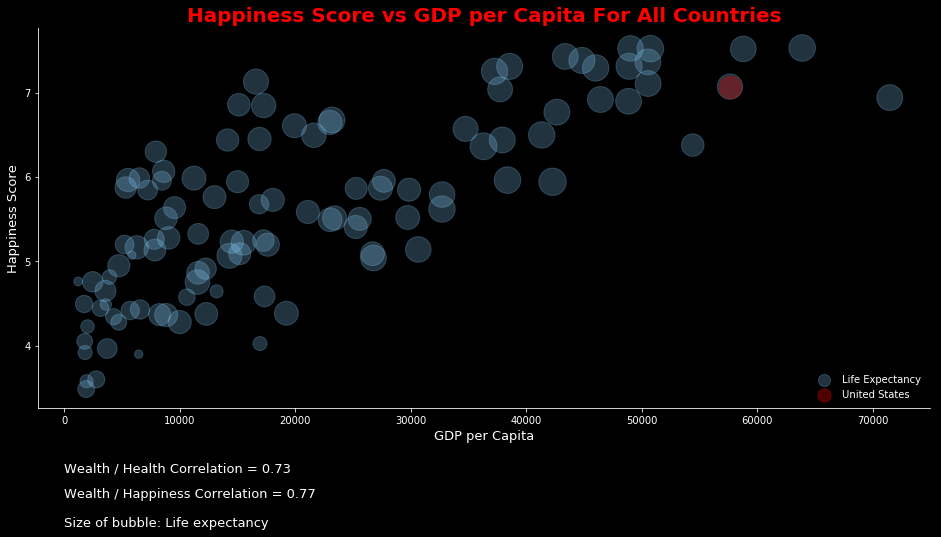

In [28]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize = (16,7))

ax.scatter(x = mdf3["GDP per capita"], y = mdf3["Happiness Score"], alpha = 0.25, s = 800 * mdf3["Health"], color = "#87CEFA")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

#Add title and axis labels
ax.set_title("Happiness Score vs GDP per Capita For All Countries", fontsize = 20, fontweight = "bold", color = "red")           
ax.set_ylabel("Happiness Score", fontsize = 13)
ax.set_xlabel("GDP per Capita", fontsize = 13)

#Calculate and add Economy correlation text
cr = mdf3["Happiness Score"].corr(mdf3["GDP per capita"])  
message = "Wealth / Happiness Correlation = " + str(round(cr,2)) 
ax.text(0, 2.2, message, size = 13, horizontalalignment='left')

#Calculate and add Health correlation text
cr = mdf3["Health"].corr(mdf3["GDP per capita"])
message = "Wealth / Health Correlation = " + str(round(cr,2)) 
ax.text(0,2.5,message, size = 13, horizontalalignment='left')

#United States highlight
ax.scatter(x = mdf3.loc['United States'][14], y = mdf3.loc['United States'][1], color = 'red',alpha = 0.3, s = 500)

#Add legend
ax.legend(["Life Expectancy", "United States"],loc = 4, frameon = False, markerscale = 0.6)
ax.text(0, 1.85, "Size of bubble: Life expectancy", size = 13, horizontalalignment='left')

plt.show()

As expected, wealth has a strong positive correlation (0.77) with happiness on a global scale. Moreover, by comparing wealth to life expectancy (reflected by the size of the scatter points), we found that wealth also has a strong correlation with health (0.73). 


The graph above tells us that wealthier countries tend to be happier and also healthier. Healthier countries also exhibit higher levels of happiness. 

The United States (highlighted red) lies on the far right end of the spectrum in terms of wealth, health and reported happiness. 

We've observed that health and wealth are significant universal drivers of happiness. Let's zoom into the richest and poorest countries to study happiness at different levels of wealth. 

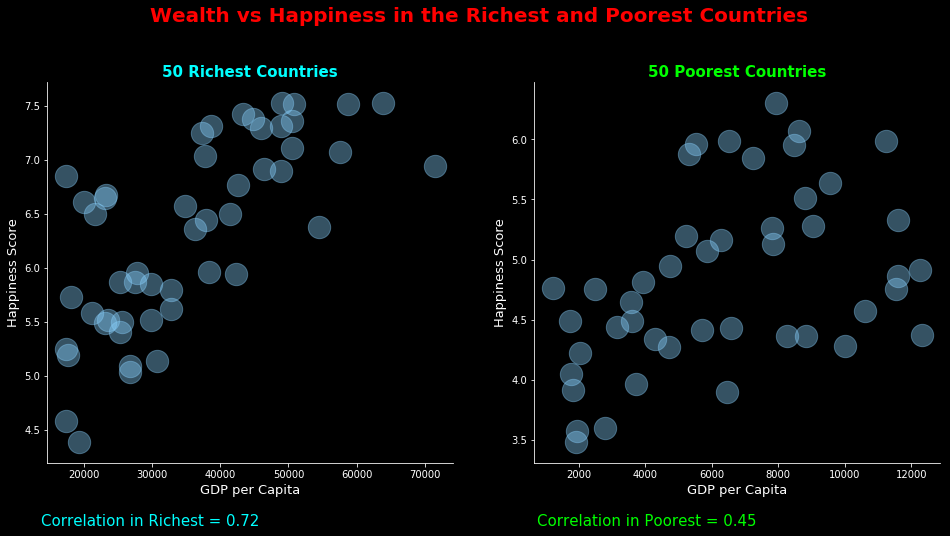

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,7))

fig.text(0.5, 1, "Wealth vs Happiness in the Richest and Poorest Countries", horizontalalignment='center', size = 20, color = "red", weight = "bold")

#plot richest countries

ax[0].scatter(y = mdf3.sort_values("GDP per capita", ascending = False).head(50)["Happiness Score"], x = mdf3.sort_values("GDP per capita", ascending = False).head(50)["GDP per capita"], alpha = 0.4, s = 500, c = "#87CEFA")

ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)

ax[0].set_title("50 Richest Countries", fontsize = 15, fontweight = "bold", color = "#00FFFF")           
ax[0].set_xlabel("GDP per Capita", fontsize = 13,)
ax[0].set_ylabel("Happiness Score", fontsize = 13,)

cr = mdf3.sort_values("GDP per capita", ascending = False).head(50)["Happiness Score"].corr(mdf3.sort_values("GDP per capita", ascending = False).head(50)["GDP per capita"])
message = "Correlation in Richest = " + str(round(cr,2)) 
fig.text(0.12,-0.00, message, horizontalalignment='left', size = 15, color = "#00FFFF") 

# plot poorest countries

ax[1].scatter(y = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["Happiness Score"], x = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["GDP per capita"], alpha = 0.4, s = 500, c = "#87CEFA")

ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

ax[1].set_title("50 Poorest Countries", fontsize = 15, fontweight = "bold", color = "#00FF00")           
ax[1].set_xlabel("GDP per Capita", fontsize = 13,)
ax[1].set_ylabel("Happiness Score", fontsize = 13,)

cr = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["Happiness Score"].corr(mdf3.sort_values("GDP per capita", ascending = False).tail(50)["GDP per capita"])
message = "Correlation in Poorest = " + str(round(cr,2)) 
fig.text(0.55,-0.00, message, horizontalalignment='left', size = 15, color = "#00FF00") 

plt.show()

In the previous chart we observed that wealth and health are good indicators of happiness globally. 

The charts directly above tell us an interesting story about wealth and its relationship to happiness. It appears that in the richest countries (GDP per capita > ~$20,000), wealth has a strong positive correlation (0.72) with happiness (i.e amongst the richest countries, more wealth tends to increase reported levels of happiness)

Interestingly, amongst the poorest countries (GDP per capita < ~$12,000) wealth has a weaker positive correlation with happiness compared to the richest countries (0.45 vs 0.72). This suggests that at lower levels of wealth, the incremental happiness from more wealth is less than at higher levels of wealth.  

We can speculate that perhaps at the lowest levels of wealth increases in wealth are still not sufficient to meet the population's basic needs. The wealth increases might not always be directed toward addressing societal problems such as crime, pollution and lack of education, which could be depressing happiness scores in the poorest countries. Increases in wealth may be pocketed by corrupt government officials instead of being invested into public infrastructure or perhaps a disproportionate amount of the increase in wealth might be funneled to the wealthy due to higher levels of inequality, and therefore does not move the needle on happiness for society at large.

Let's investigate how crime, pollution and education trend at different levels of wealth and their impact on happiness.

### Crime, Wealth and Happiness

In [30]:
#Add column representing crime quantile to each row
mdf3["crime index quintile"] = pd.qcut(mdf3["Crime Index"], 5, labels = [1,2,3,4,5] , retbins=False, precision=3, duplicates='raise')

#split by crime index quantile
cqdf = mdf3.groupby("crime index quintile").mean()

In [31]:
cqdf

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Primary Enrollment,Air Pollution (% pop),Air Pollution (exposure),GINI,Patent applications,GDP per capita,GDP,Population,Population density,Crime Index,Safety Index
crime index quintile,,,,,,,,,,,,,,,,,,,,
1,48.942029,6.149116,1.224043,1.150699,0.768640,0.475483,0.212559,0.214312,2.103353,97.028006,81.048920,17.736099,31.075000,15587.095238,33846.315725,6.821212e+11,1.780591e+07,187.802823,27.986522,72.013478
2,58.030303,5.913667,1.162793,1.109601,0.690894,0.410831,0.199398,0.208532,2.131665,97.435546,84.598268,36.878498,41.900000,65282.315789,28444.727641,1.721350e+12,8.703196e+07,188.804445,38.120000,61.880000
3,80.043478,5.337594,0.954710,0.994804,0.629961,0.412167,0.151712,0.193866,2.000392,94.609103,93.175931,26.754112,30.333333,1571.789474,17106.732378,8.153447e+11,8.790059e+07,133.436464,46.350870,53.649130
4,77.553030,5.393220,0.840810,1.009018,0.554461,0.427895,0.173204,0.202764,2.185076,94.730618,97.235573,31.260011,45.325000,20874.333333,13496.900600,1.321769e+12,5.670648e+07,115.251392,55.371364,44.628636
5,82.152174,5.291899,0.782483,0.943839,0.459759,0.400991,0.148305,0.189536,2.366927,91.572597,98.698527,40.837307,41.962500,741.571429,11074.609531,4.271605e+11,4.062860e+07,172.251437,70.240000,29.760000


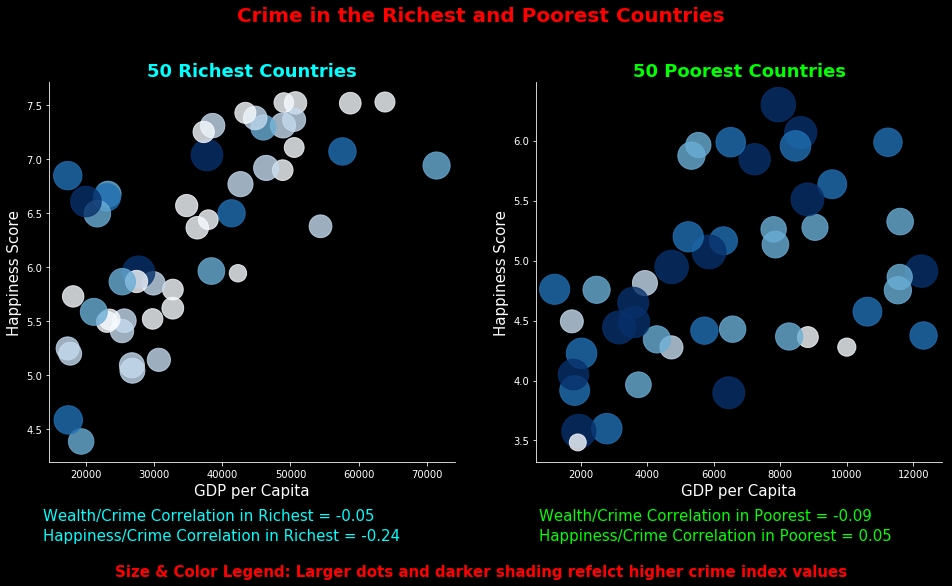

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,7))

fig.text(0.5, 1, "Crime in the Richest and Poorest Countries", horizontalalignment='center', size = 20, color = "red", weight = "bold")

#plot richest countries

c = mdf3.sort_values("GDP per capita", ascending = False).head(50)["crime index quintile"]

ax[0].scatter(y = mdf3.sort_values("GDP per capita", ascending = False).head(50)["Happiness Score"], x = mdf3.sort_values("GDP per capita", ascending = False).head(50)["GDP per capita"], alpha = 0.8, s = mdf3.sort_values("GDP per capita", ascending = False).head(50)["Crime Index"]* 15, c = c, cmap = "Blues")

ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)

ax[0].set_title("50 Richest Countries", fontsize = 18, fontweight = "bold", color = "#00FFFF")           
ax[0].set_xlabel("GDP per Capita", fontsize = 15,)
ax[0].set_ylabel("Happiness Score", fontsize = 15,)

cr1 = mdf3.sort_values("GDP per capita", ascending = False).head(50)["Crime Index"].corr(mdf3.sort_values("GDP per capita", ascending = False).head(50)["Happiness Score"])
message = "Wealth/Crime Correlation in Richest = " + str(round(cr1,2)) 
fig.text(0.12,0.01, message, horizontalalignment='left', size = 15, color = "#00FFFF") 

cr2 = mdf3.sort_values("GDP per capita", ascending = False).head(50)["Crime Index"].corr(mdf3.sort_values("GDP per capita", ascending = False).head(50)["GDP per capita"])
message = "Happiness/Crime Correlation in Richest = " + str(round(cr2,2)) 
fig.text(0.12,-0.03, message, horizontalalignment='left', size = 15, color = "#00FFFF") 

# plot poorest countries

c = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["crime index quintile"]

ax[1].scatter(y = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["Happiness Score"], x = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["GDP per capita"], alpha = 0.8, s = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["Crime Index"]* 15, c = c, cmap = "Blues")

ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

ax[1].set_title("50 Poorest Countries", fontsize = 18, fontweight = "bold", color = "#00FF00")           
ax[1].set_xlabel("GDP per Capita", fontsize = 15,)
ax[1].set_ylabel("Happiness Score", fontsize = 15,)

cr3 = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["GDP per capita"].corr(mdf3.sort_values("GDP per capita", ascending = False).tail(50)["Crime Index"])
message = "Wealth/Crime Correlation in Poorest = " + str(round(cr3,2)) 
fig.text(0.55, 0.01, message, horizontalalignment='left', size = 15, color = "#00FF00") 

cr4 = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["Crime Index"].corr(mdf3.sort_values("GDP per capita", ascending = False).tail(50)["Happiness Score"])
message = "Happiness/Crime Correlation in Poorest = " + str(round(cr4,2)) 
fig.text(0.55,-0.03, message, horizontalalignment='left', size = 15, color = "#00FF00") 

fig.text(0.5,-0.1, "Size & Color Legend: Larger dots and darker shading refelct higher crime index values", horizontalalignment='center', size = 15, color = "red", weight = "bold")

plt.show()

In the chart above, we see that richest countries have lower crime indexes (reflected by lighter, smaller dots) compared to the poorest countries (darker, larger dots). However, within both groups we found a negligible (< 0.1) correlation between wealth and crime. Therefore, we can infer that changes in wealth of large magnitudes (richest vs poorest countries) have an impact on crime while changes in wealth of small magnitudes (within the richest/poorest sets) do not have a significant impact on crime.

In the richest countries, happiness and crime are negatively correlated (-0.24) while in the poorest countries, we observed no significant relationship (<0.1) between happiness and crime. This suggests that less crime tends improves happiness in the richest countries, but not in the poorest. This could be because the poorest countries experience other more pressing problems that influence their happiness more than crime. 

Let's continue to explore pollution and education indicators to see if they might have a greater impact on happiness. 

### Pollution, Wealth and Happiness

In [33]:
#Add column representing pollution quantile to each row
mdf3["air pollution quintile"] = pd.qcut(mdf3["Air Pollution (exposure)"], 5, labels = [.2, .4, .6, 0.8, 1.0] , retbins=False, precision=3, duplicates='raise')
#split by pollution index quantile
pqdf = mdf3.groupby("air pollution quintile").mean()

In [34]:
pqdf

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Primary Enrollment,Air Pollution (% pop),Air Pollution (exposure),GINI,Patent applications,GDP per capita,GDP,Population,Population density,Crime Index,Safety Index
air pollution quintile,,,,,,,,,,,,,,,,,,,,
0.2,26.956522,6.729826,1.338828,1.267135,0.828731,0.529981,0.264170,0.271026,2.229985,98.518390,55.819013,9.615440,42.066667,29864.909091,41642.793938,1.933023e+12,4.638792e+07,144.022407,38.381739,61.618261
0.4,50.636364,6.060561,1.139427,1.115243,0.724124,0.430373,0.143716,0.196450,2.311198,96.216125,99.883738,16.494745,44.000000,1053.550000,25294.448184,6.060729e+11,3.262783e+07,166.004282,47.046364,52.953636
0.6,78.391304,5.359304,0.831134,0.998676,0.536655,0.403878,0.161712,0.188280,2.238924,95.334346,99.861117,21.645417,36.085714,419.250000,13599.738992,2.108900e+11,1.961679e+07,101.889113,49.576957,50.423043
0.8,92.984848,5.029439,0.914635,0.971093,0.566745,0.379613,0.112577,0.138110,1.946667,93.125627,99.977600,29.889039,39.733333,576.470588,11834.659305,2.472911e+11,2.148268e+07,126.281908,52.884545,47.115455
1.0,98.101449,4.896935,0.743007,0.854410,0.449439,0.382271,0.197947,0.211807,2.058080,93.290878,99.999556,74.875528,37.150000,94342.076923,9758.935782,2.032512e+12,1.660615e+08,262.772841,50.459130,49.540870


In [35]:
# Coutries with the 5 highest pollution levels amongst the 50 richest countries set
mdf3.sort_values("GDP per capita", ascending = False).head(50).sort_values("Air Pollution (exposure)", ascending = False).head(5)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Primary Enrollment,...,GINI,Patent applications,GDP per capita,GDP,Population,Population density,Crime Index,Safety Index,crime index quintile,air pollution quintile
Country,,,,,,,,,,,,,,,,,,,,,
Saudi Arabia,35.333333,6.378000,1.471855,1.072966,0.634356,0.379757,0.257645,0.188354,2.372990,NaN,...,NaN,1070.0,54416.612493,1.756334e+12,32275687,15.014112,34.57,65.43,2,1.0
Iraq,113.666667,4.583000,1.054313,0.796518,0.538103,0.179039,0.157959,0.160775,1.696276,NaN,...,NaN,NaN,17348.936532,6.454251e+11,37202572,85.657055,54.06,45.94,4,1.0
Turkey,74.333333,5.407000,1.141391,1.053748,0.672169,0.255927,0.109211,0.089757,2.085099,NaN,...,41.9,6230.0,25247.201750,2.007466e+12,79512426,103.312535,36.40,63.60,2,1.0
Azerbaijan,82.000000,5.245667,1.100407,0.950250,0.575422,0.373909,0.128353,0.105126,2.012237,94.965286,...,NaN,144.0,17256.626970,1.683869e+11,9757812,118.043284,35.47,64.53,2,0.8
Bulgaria,122.666667,4.383000,1.095560,1.155313,0.717589,0.269097,0.042683,0.086064,1.016606,93.158920,...,NaN,230.0,19242.622616,1.371580e+11,7127822,65.657903,43.45,56.55,3,0.8


In [36]:
mdf3.columns

Index(['Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity', 'Dystopia Residual',
       'Primary Enrollment', 'Air Pollution (% pop)',
       'Air Pollution (exposure)', 'GINI', 'Patent applications',
       'GDP per capita', 'GDP', 'Population', 'Population density',
       'Crime Index', 'Safety Index', 'crime index quintile',
       'air pollution quintile'],
      dtype='object')

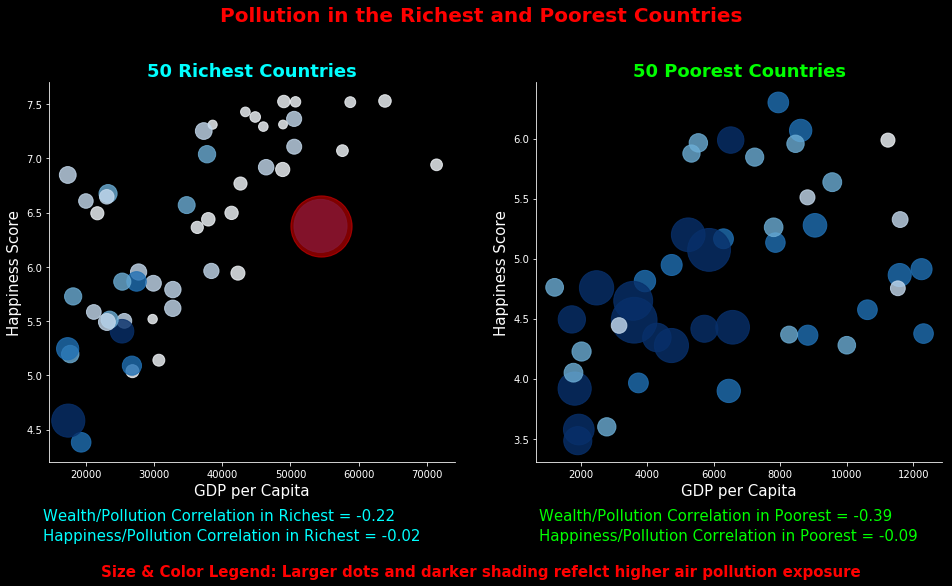

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,7))

#Title
fig.text(0.5, 1, "Pollution in the Richest and Poorest Countries", horizontalalignment='center', size = 20, color = "red", weight = "bold")

#plot richest countries

c = mdf3.sort_values("GDP per capita", ascending = False).head(50)["air pollution quintile"]

ax[0].scatter(y = mdf3.sort_values("GDP per capita", ascending = False).head(50)["Happiness Score"], x = mdf3.sort_values("GDP per capita", ascending = False).head(50)["GDP per capita"], alpha = 0.8, s = mdf3.sort_values("GDP per capita", ascending = False).head(50)["Air Pollution (exposure)"]* 15, c = c, cmap = "Blues")

ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)

ax[0].set_title("50 Richest Countries", fontsize = 18, fontweight = "bold", color = "#00FFFF")           
ax[0].set_xlabel("GDP per Capita", fontsize = 15,)
ax[0].set_ylabel("Happiness Score", fontsize = 15,)

cr1 = mdf3.sort_values("GDP per capita", ascending = False).head(50)["Air Pollution (exposure)"].corr(mdf3.sort_values("GDP per capita", ascending = False).head(50)["Happiness Score"])
message = "Wealth/Pollution Correlation in Richest = " + str(round(cr1,2)) 
fig.text(0.12,0.01, message, horizontalalignment='left', size = 15, color = "#00FFFF") 

cr2 = mdf3.sort_values("GDP per capita", ascending = False).head(50)["Air Pollution (exposure)"].corr(mdf3.sort_values("GDP per capita", ascending = False).head(50)["GDP per capita"])
message = "Happiness/Pollution Correlation in Richest = " + str(round(cr2,2)) 
fig.text(0.12,-0.03, message, horizontalalignment='left', size = 15, color = "#00FFFF") 

#Saudi Arabia highlight
ax[0].scatter(x = mdf3.loc['Saudi Arabia'][14], y = mdf3.loc['Saudi Arabia'][1], color = 'red', alpha = 0.5, s = mdf3.loc['Saudi Arabia'][11]* 20)

# plot poorest countries

c = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["air pollution quintile"]

ax[1].scatter(y = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["Happiness Score"], x = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["GDP per capita"], alpha = 0.8, s = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["Air Pollution (exposure)"]* 15, c = c, cmap = "Blues")

ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

ax[1].set_title("50 Poorest Countries", fontsize = 18, fontweight = "bold", color = "#00FF00")           
ax[1].set_xlabel("GDP per Capita", fontsize = 15,)
ax[1].set_ylabel("Happiness Score", fontsize = 15,)

cr3 = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["Air Pollution (exposure)"].corr(mdf3.sort_values("GDP per capita", ascending = False).tail(50)["GDP per capita"])
message = "Wealth/Pollution Correlation in Poorest = " + str(round(cr3,2)) 
fig.text(0.55, 0.01, message, horizontalalignment='left', size = 15, color = "#00FF00") 

cr4 = mdf3.sort_values("GDP per capita", ascending = False).tail(50)["Air Pollution (exposure)"].corr(mdf3.sort_values("GDP per capita", ascending = False).tail(50)["Happiness Score"])
message = "Happiness/Pollution Correlation in Poorest = " + str(round(cr4,2)) 
fig.text(0.55,-0.03, message, horizontalalignment='left', size = 15, color = "#00FF00") 

fig.text(0.5,-0.1, "Size & Color Legend: Larger dots and darker shading refelct higher air pollution exposure", horizontalalignment='center', size = 15, color = "red", weight = "bold")

plt.show()

Similar to our finding in the analysis of crime, here we clearly see that the 50 richest countries have lower pollution exposure levels (smaller, lighter dots) than the 50 poorest. Highlighted in red is Saudi Arabia, the country with the highest level of pollution amongst the richest nations. 

In the case of pollution, we found stronger negative correlations between wealth and pollution in both the richest (-0.22) and poorest countires(-0.39). Therefore, here we can infer that, similar to crime, changes in wealth of large magnitudes (richest vs poorest countries) have a significant impact on pollution but unlike the crime results, changes in wealth of small magnitudes (within the richest/poorest sets) also have a significant impact on pollution. Increases in wealth lead to declines in pollution exposure levels for both the richest and poorest groups. 

Possible reasons for this trend include: 
1. Higher GDP per capita economies tend to be more service oriented (vs industrial production) and therefore produce less pollution
2. More wealth enables countries to invest in pollution reducing technology in production facilities and households
3. Wealthier citizens are more concerned about pollution since their basic needs are more likely to be met

In both the richest and poorest countries, we observed no significant relationship (<0.1) between happiness and pollution. This suggests that other factors might be influencing happiness in these sets of countries. 

Let's continue to explore trends in education and its impact on happiness.

### Education, Wealth and Happiness

In [38]:
mdf4.head()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Primary Enrollment,...,Air Pollution (exposure),GINI,Patent applications,GDP per capita,GDP,Population,Population density,Crime Index,Safety Index,Human Capital
country,,,,,,,,,,,,,,,,,,,,,
Switzerland,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.374120,0.314872,2.496242,99.759949,...,10.512087,NaN,1462.0,63888.732387,5.349029e+11,8372413,211.874000,26.77,73.23,2.916799
Denmark,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.427793,0.367957,2.515046,99.020897,...,10.328744,NaN,1552.0,49029.014839,2.808387e+11,5728010,135.535706,25.71,74.29,2.927232
Iceland,2.666667,7.522000,1.403204,1.398688,0.882907,0.607391,0.255580,0.355536,2.618698,NaN,...,7.298390,NaN,35.0,50745.682977,1.702208e+10,335439,3.346025,33.32,66.68,3.067022
Norway,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.361601,0.347301,2.468996,99.806198,...,7.874068,NaN,1227.0,58790.061404,3.078336e+11,5236151,14.335996,31.19,68.81,3.419934
Finland,5.333333,7.429333,1.379934,1.331049,0.836393,0.610227,0.356414,0.290347,2.625231,99.123489,...,6.234267,NaN,1260.0,43378.146029,2.383761e+11,5495303,18.083198,29.55,70.45,2.924152


In [39]:
mdf4["human capital quintile"] = pd.qcut(mdf4["Human Capital"], 5, labels = [.2, .4, .6, 0.8, 1.0] , retbins=False, precision=3, duplicates='raise')
#split by hc index quantile
hcqdf = mdf4.groupby("human capital quintile").mean()
hcqdf.head()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Primary Enrollment,...,Air Pollution (exposure),GINI,Patent applications,GDP per capita,GDP,Population,Population density,Crime Index,Safety Index,Human Capital
human capital quintile,,,,,,,,,,,,,,,,,,,,,
0.2,107.009259,4.694287,0.639934,0.829850,0.419432,0.395463,0.169221,0.201759,2.038618,91.493883,...,54.214082,37.150000,1701.833333,6811.674260,9.540680e+11,1.315304e+08,206.422165,52.180556,47.819444,1.950546
0.4,74.777778,5.460167,0.923892,1.072408,0.568502,0.428316,0.136167,0.170930,2.159887,91.704130,...,33.564895,43.875000,742.125000,14930.430309,4.872930e+11,3.070271e+07,110.736943,56.434444,43.565556,2.515956
0.6,56.814815,5.885741,1.113150,1.112627,0.680701,0.440010,0.141232,0.165839,2.232187,97.538829,...,23.448649,45.740000,1904.588235,21005.557296,6.803960e+11,2.905766e+07,209.526506,47.861667,52.138333,2.810161
0.8,46.981481,6.185130,1.228730,1.130346,0.777324,0.443869,0.185511,0.205582,2.213749,96.207710,...,15.004744,35.133333,1481.777778,32273.183609,4.863240e+11,1.457019e+07,166.444471,39.595000,60.405000,2.991706
1.0,39.037037,6.436259,1.315062,1.253145,0.797520,0.490337,0.233430,0.261075,2.085681,98.380154,...,13.344642,35.433333,36642.352941,39972.337854,1.927329e+12,4.089449e+07,138.529961,37.432222,62.567778,3.302611


In [40]:
mdf4.head()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Primary Enrollment,...,GINI,Patent applications,GDP per capita,GDP,Population,Population density,Crime Index,Safety Index,Human Capital,human capital quintile
country,,,,,,,,,,,,,,,,,,,,,
Switzerland,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.374120,0.314872,2.496242,99.759949,...,NaN,1462.0,63888.732387,5.349029e+11,8372413,211.874000,26.77,73.23,2.916799,0.8
Denmark,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.427793,0.367957,2.515046,99.020897,...,NaN,1552.0,49029.014839,2.808387e+11,5728010,135.535706,25.71,74.29,2.927232,0.8
Iceland,2.666667,7.522000,1.403204,1.398688,0.882907,0.607391,0.255580,0.355536,2.618698,NaN,...,NaN,35.0,50745.682977,1.702208e+10,335439,3.346025,33.32,66.68,3.067022,0.8
Norway,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.361601,0.347301,2.468996,99.806198,...,NaN,1227.0,58790.061404,3.078336e+11,5236151,14.335996,31.19,68.81,3.419934,1.0
Finland,5.333333,7.429333,1.379934,1.331049,0.836393,0.610227,0.356414,0.290347,2.625231,99.123489,...,NaN,1260.0,43378.146029,2.383761e+11,5495303,18.083198,29.55,70.45,2.924152,0.8


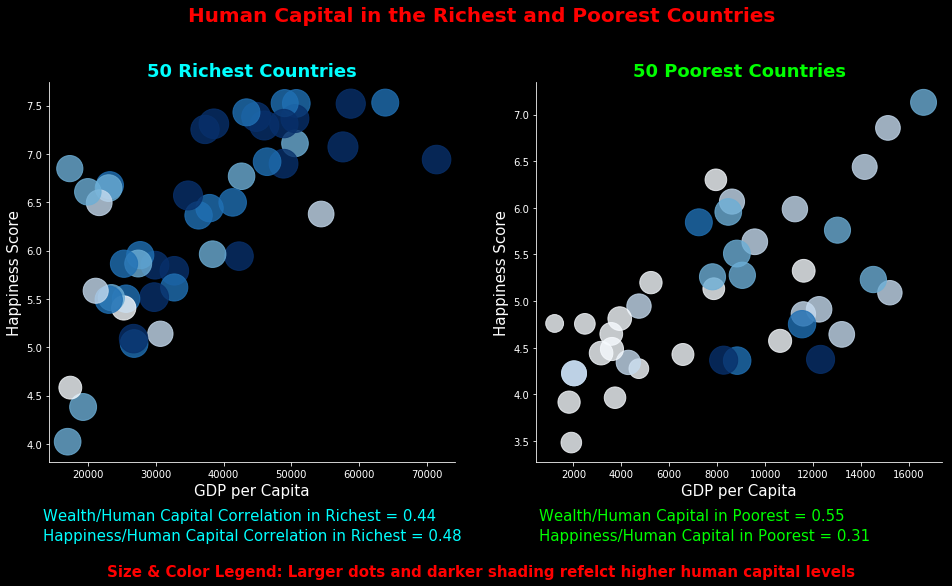

In [41]:
plt.style.use('dark_background')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,7))

#Title
fig.text(0.5, 1, "Human Capital in the Richest and Poorest Countries", horizontalalignment='center', size = 20, color = "red", weight = "bold")

#plot richest countries

c = mdf4.sort_values("GDP per capita", ascending = False).head(50)["human capital quintile"]

ax[0].scatter(y = mdf4.sort_values("GDP per capita", ascending = False).head(50)["Happiness Score"], x = mdf4.sort_values("GDP per capita", ascending = False).head(50)["GDP per capita"], alpha = 0.8, s = mdf4.sort_values("GDP per capita", ascending = False).head(50)["Human Capital"]* 250, c = c, cmap = "Blues")

ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)

ax[0].set_title("50 Richest Countries", fontsize = 18, fontweight = "bold", color = "#00FFFF")           
ax[0].set_xlabel("GDP per Capita", fontsize = 15,)
ax[0].set_ylabel("Happiness Score", fontsize = 15,)

cr1 = mdf4.sort_values("GDP per capita", ascending = False).head(50)["Human Capital"].corr(mdf4.sort_values("GDP per capita", ascending = False).head(50)["Happiness Score"])
message = "Wealth/Human Capital Correlation in Richest = " + str(round(cr1,2)) 
fig.text(0.12,0.01, message, horizontalalignment='left', size = 15, color = "#00FFFF") 

cr2 = mdf4.sort_values("GDP per capita", ascending = False).head(50)["Human Capital"].corr(mdf4.sort_values("GDP per capita", ascending = False).head(50)["GDP per capita"])
message = "Happiness/Human Capital Correlation in Richest = " + str(round(cr2,2)) 
fig.text(0.12,-0.03, message, horizontalalignment='left', size = 15, color = "#00FFFF") 

# plot poorest countries

c = mdf4.sort_values("GDP per capita", ascending = False).tail(50)["human capital quintile"]

ax[1].scatter(y = mdf4.sort_values("GDP per capita", ascending = False).tail(50)["Happiness Score"], x = mdf4.sort_values("GDP per capita", ascending = False).tail(50)["GDP per capita"], alpha = 0.8, s = mdf4.sort_values("GDP per capita", ascending = False).tail(50)["Human Capital"]* 250, c = c, cmap = "Blues")

ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)

ax[1].set_title("50 Poorest Countries", fontsize = 18, fontweight = "bold", color = "#00FF00")           
ax[1].set_xlabel("GDP per Capita", fontsize = 15,)
ax[1].set_ylabel("Happiness Score", fontsize = 15,)

cr3 = mdf4.sort_values("GDP per capita", ascending = False).tail(50)["Human Capital"].corr(mdf4.sort_values("GDP per capita", ascending = False).tail(50)["GDP per capita"])
message = "Wealth/Human Capital in Poorest = " + str(round(cr3,2)) 
fig.text(0.55, 0.01, message, horizontalalignment='left', size = 15, color = "#00FF00") 

cr4 = mdf4.sort_values("GDP per capita", ascending = False).tail(50)["Human Capital"].corr(mdf4.sort_values("GDP per capita", ascending = False).tail(50)["Happiness Score"])
message = "Happiness/Human Capital in Poorest = " + str(round(cr4,2)) 
fig.text(0.55,-0.03, message, horizontalalignment='left', size = 15, color = "#00FF00") 

fig.text(0.5,-0.1, "Size & Color Legend: Larger dots and darker shading refelct higher human capital levels", horizontalalignment='center', size = 15, color = "red", weight = "bold")

plt.show()

With Human Capital, we again see a stark disparity between the richest and poorest countries. The 50 richest countries have higher human capital levels (darker, slightly larger dots) than the 50 poorest. 

Human capital exhibits a much stronger relationship to wealth compared to crime and pollution indicators. We found strong positive correlations between wealth and human capital in both the richest (0.44) and poorest countires(0.55). Therefore, similar to crime and pollution, changes in wealth of large magnitudes (richest vs poorest countries) have a significant impact on human capital but unlike the crime results and even more so than the pollution results, changes in wealth of small magnitudes (within the richest/poorest sets) have a significant impact on human capital. Increases in wealth lead to declines in human capital levels for both the richest and poorest groups. 

Possible reasons for this trend include: 
1. Higher GDP per capita economies tend to be more service oriented (vs industrial production) and therefore require highly skilled workers
2. More wealth enables countries to increase access to and subsidies for education 
3. Wealthier citizens are more able to afford education

Interestingly, we observed a significant positive relationship between happiness and human capital in both the richest group (0.48) and the poorest group (0.31). This suggests that education is an important driver of happiness universally and increases in education lead to increases in happiness levels. This finding could reflect the platonic teaching that true happiness is derived from knowledge or it could reflect the economic reality that more educated countries produce higher value products and are therefore wealthier, and better able to meet their basic needs and satisfy their desires. 

To conclude our analysis, let's observe trends in happiness indicators across countries with different GDP per capita to understand how wealth influences indicators of happiness such as economic wellbeing, health, family, freedom, generosity and trust in the government. 

### Conclusion: Wealth and Happiness

In [42]:
#Add column representing GDP per capita quantile to each row
mdf3["GDP per capita quantile"] = pd.qcut(mdf3["GDP per capita"], 5, labels = [1, 2, 3, 4, 5] , retbins=False, precision=3, duplicates='raise')
#split by GDP per capita quantile
qdf = mdf3.groupby("GDP per capita quantile").mean()
qdf.head()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Primary Enrollment,Air Pollution (% pop),Air Pollution (exposure),GINI,Patent applications,GDP per capita,GDP,Population,Population density,Crime Index,Safety Index
GDP per capita quantile,,,,,,,,,,,,,,,,,,,,
1,114.613636,4.513947,0.477369,0.813832,0.365620,0.367133,0.185747,0.234240,2.069961,89.746669,99.997456,53.347729,36.233333,73.000000,3507.573768,2.002826e+11,5.076053e+07,182.688390,55.182273,44.817727
2,84.873016,5.189127,0.851707,0.932996,0.566006,0.413959,0.138218,0.153305,2.132959,93.853683,99.812305,27.936882,38.785714,1093.187500,8805.084746,7.163766e+11,9.605484e+07,132.731142,53.089048,46.910952
3,73.045455,5.518591,1.041549,1.096911,0.620880,0.394541,0.135027,0.157230,2.072452,95.391199,98.636998,28.333058,41.500000,64127.789474,15852.165055,1.510900e+12,9.675201e+07,100.998680,50.803636,49.196364
4,57.031746,5.868302,1.218841,1.124316,0.750324,0.392597,0.109630,0.144072,2.128472,96.562120,91.793629,17.485021,40.075000,1117.578947,27811.795165,4.300863e+11,1.537499e+07,117.922312,38.775714,61.224286
5,16.772727,7.007182,1.409337,1.278066,0.840379,0.549477,0.296474,0.314023,2.319447,98.692824,62.904528,18.944612,41.500000,31572.333333,48380.451399,2.034960e+12,4.108903e+07,203.329922,37.558182,62.441818


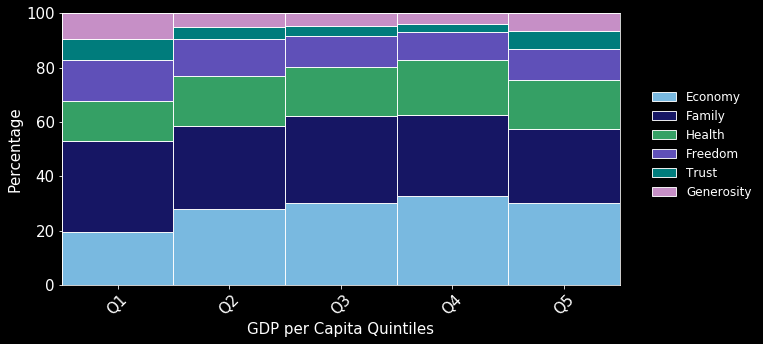

In [43]:
# code adapted from: https://chrisalbon.com/python/data_visualization/matplotlib_percentage_stacked_bar_plot/

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(qdf.index))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each quartile
totals = [i+j+k+m+n+o for i,j,k,m,n,o in zip(qdf['Economy'],
                                 qdf['Family'], 
                                 qdf['Health'], 
                                 qdf['Freedom'], 
                                 qdf['Trust'],
                                 qdf['Generosity'])]

# Create the percentage of the total score the Economy value for each quartile was
Econ_rel = [i / j * 100 for  i,j in zip(qdf['Economy'], totals)]

# Create the percentage of the total score the Family value for each quartile was
Fam_rel = [i / j * 100 for  i,j in zip(qdf['Family'], totals)]

# Create the percentage of the total score the Health value for each quartile was
Health_rel = [i / j * 100 for  i,j in zip(qdf['Health'], totals)]

# Create the percentage of the total score the Economy value for each quartile was
Free_rel = [i / j * 100 for  i,j in zip(qdf['Freedom'], totals)]

# Create the percentage of the total score the Trust value for each quartile was
Trust_rel = [i / j * 100 for  i,j in zip(qdf['Trust'], totals)]

# Create the percentage of the total score the Generosity value for each quartile was
Gen_rel = [i / j * 100 for  i,j in zip(qdf['Generosity'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       Econ_rel, 
       # labeled 
       label='Economy', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#87CEFA',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       Fam_rel, 
       # with pre_rel
       bottom=Econ_rel, 
       # labeled 
       label='Family', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#191970', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       Health_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(Econ_rel, Fam_rel)], 
       # labeled 
       label='Health',
       # with alpha
       alpha=0.9, 
       # with color
       color='#3CB371', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       Free_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(Econ_rel, Fam_rel, Health_rel)], 
       # labeled 
       label='Freedom',
       # with alpha
       alpha=0.9, 
       # with color
       color='#6A5ACD', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       Trust_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+m for i,j,k,m in zip(Econ_rel, Fam_rel, Health_rel, Free_rel)], 
       # labeled 
       label='Trust',
       # with alpha
       alpha=0.9, 
       # with color
       color='#008B8B', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

ax.bar(bar_l, 
       # using post_rel data
       Gen_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k+m+n for i,j,k,m,n in zip(Econ_rel, Fam_rel, Health_rel, Free_rel, Trust_rel)], 
       # labeled 
       label='Generosity',
       # with alpha
       alpha=0.9, 
       # with color
       color='#DDA0DD', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(range(5),["Q1","Q2","Q3","Q4","Q5"], fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_ylabel("Percentage", fontsize = 15)
ax.set_xlabel("GDP per Capita Quintiles", fontsize = 15)

# Let the borders of the graphic
plt.xlim(-0.5, 4.5)
plt.ylim(0, 100)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='center')


ax.legend(loc = (1.05,0.3),fontsize = "large" ,frameon = False)

# shot plot
plt.show()

By segmenting the countries by their GDP per capita (x axis), we can observe interesting relationships between wealth and the indicators of happiness. The y axis represents the percentage of the quintile's mean happiness score that is explained by each indicator (Economy, Family, Health, Freedom, Trust and Generosity). 

#### Happiness attributed to the Economy and Health increases across Q1 to Q4 and decreases in Q5

As GDP per capita increases across the quintiles (left to right), we observe that the economy (as measured by GDP per capital) becomes an increasingly significant driver of happiness. This corroborates our earlier finding that wealth and happiness have a high positive correlation (0.77) globally. Most interestingly, we see a dip in the happiness attributed to wealth in Q5 suggesting that after a certain level incremental wealth does not result in more happiness. 

We already observed the strong positive correlation between wealth and health. The chart above suggests that as the wealth increases from Q1 to Q4, the accessibility and quality of healthcare improves resulting in more happiness attributed to health (measured by life expectancy). Similar to the Economy indicator, the proportion of happiness due to healthcare dips in Q5.

This result tells us that wealth and health are essential drivers of happiness to a certain point beyond which other less essential factors such as freedom, trust and generosity become relatively more important.

#### Happiness attributed to Freedom, Generosity and Trust decline across Q1 to Q4 and increase in Q5

There appears to be a negative correlation between the proportion of happiness attributed to freedom, generosity and trust and the proportion attributed to the economy and health. From Q1 to Q4, the proportion of happiness attributed to the economy and health increases while the proportion attributed to freedom, generosity and trust decreases. However, in Q5 we observe a reversal in this trend, with the proportion of happiness attributed to economy and health decreasing and the proportion attributed to freedom, generosity and trust increasing. 

This trend suggests that wealth and health are essential drivers of happiness. Until satisfactoy levels are attained, they take priority over freedom, trust and generosity. However, in the top quintile of wealth, presumably people are able to meet their basic needs and begin to derive more happiness from the non-essential drivers.   

 #### Happiness attributed to Family appears to be highest in Q1 and decreases thereafter

This result highlights the importance of one's personal network in the poorest countries. As social animals, we all seek meaningful relationships with friends and family. However, in the poorest countries, networks might be more interdependent with household members working closely together in family run businesses. Moreover, with less support from the state and public institions, those in poorer countries must depend on their friends and family for aid. As countries become wealthier, social organizations such as corporations emerge and state support becomes more widely available reducing the economic need for and happiness derived from a strong family network. 

In conclusion, more wealth tends to lead to more happiness. However, our analysis suggests that the factors contributing to happiness vary with wealth